In [2]:
import itertools
import copy
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np


In [4]:

# Let's use the dataset we scrapted from the crowdsourcing website

# we create a graph using the edglist
edgelist=pd.read_csv('/content/drive/MyDrive/Notebooks/data/follow_el.csv', header=None)
edgelist=edgelist.to_numpy().tolist()
print(edgelist)

# Here we use the individual level data we scrapted
nodelist= pd.read_csv('/content/drive/MyDrive/Notebooks/data/artists2.csv', header=0)

# create a new varaible tenure
nodelist["tenure"]=2021-nodelist["since"]

# subset the variables we want
nodelist=nodelist.iloc[:,[5,6,1]]

# bin tenure and number of designs submitted
nodelist["tenure_cat"]=pd.qcut(nodelist["tenure"], q=[0, 0.6, 1],
                             labels=["blue","red"])
nodelist["submitted_cat"]=pd.qcut(nodelist["submitted"], q=[0, 0.6, 1],
                              labels=["blue","red"])

# make author name as index
nodelist=nodelist.set_index(nodelist.author)
nodelist.head()
nodelist.loc["EggCoop"]



[['Artefact3', 'Adamraydaniels'], ['Artefact3', 'BedlamBones'], ['Caterpill', 'BedlamBones'], ['Artefact3', 'footsawtees'], ['Caterpill', 'footsawtees'], ['artecco', 'footsawtees'], ['footsawtees', 'Jemae'], ['footsawtees', 'nicepunk'], ['footsawtees', 'Alundrart'], ['footsawtees', 'ANGRYMERL'], ['footsawtees', 'JonzShop'], ['footsawtees', 'Artefact3'], ['footsawtees', 'neni_art__'], ['gamerzink357', 'gulayfather'], ['Artefact3', 'gulayfather'], ['Caterpill', 'gulayfather'], ['Artefact3', 'venozoic'], ['Caterpill', 'venozoic'], ['HOLOM', 'VirtualSG'], ['Artefact3', 'VirtualSG'], ['Caterpill', 'VirtualSG'], ['mani1991', 'beramsey'], ['markyartshop', 'beramsey'], ['mckirbzx', 'beramsey'], ['Hunniebee00', 'beramsey'], ['Artefact3', 'beramsey'], ['Caterpill', 'beramsey'], ['beramsey', 'mckirbzx'], ['beramsey', 'gamerzink357'], ['beramsey', 'JonzShop'], ['beramsey', 'Artefact3'], ['beramsey', 'mani1991'], ['beramsey', 'markyartshop'], ['beramsey', 'TheSimpleStore'], ['bellaballestas', 'TheC

author           EggCoop
tenure                 0
submitted              4
tenure_cat          blue
submitted_cat       blue
Name: EggCoop, dtype: object

# Create a Network Graph

In [6]:
# Create empty DIRECTED graph
G = nx.DiGraph()

# Add edges
G.add_edges_from(edgelist)

print('# of edges: {}'.format(G.number_of_edges()))
print('# of nodes: {}'.format(G.number_of_nodes()))

print(list(G.nodes)[0:5])

# Add node attributes
for i in G.nodes:
    G.add_nodes_from([i], tenure=nodelist.loc[i][3])
    G.add_nodes_from([i], submitted=nodelist.loc[i][4])
print(G.nodes["Artefact3"])

# Let's get to know more about the graph we created
# is it directed?
print(f"Directed Graph: {nx.is_directed(G)}")

# network density
print(nx.density(G))

# neighbors of each node
neighbors=[]
for i in nx.neighbors(G, "DailyCollection"):
    neighbors.append(i)
neighbors

# get adjacency matrix
print(nx.incidence_matrix(G).todense())



# of edges: 720
# of nodes: 168
['Artefact3', 'Adamraydaniels', 'BedlamBones', 'Caterpill', 'footsawtees']
{'tenure': 'blue', 'submitted': 'red'}
Directed Graph: True
0.02566295979469632
[[1. 1. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


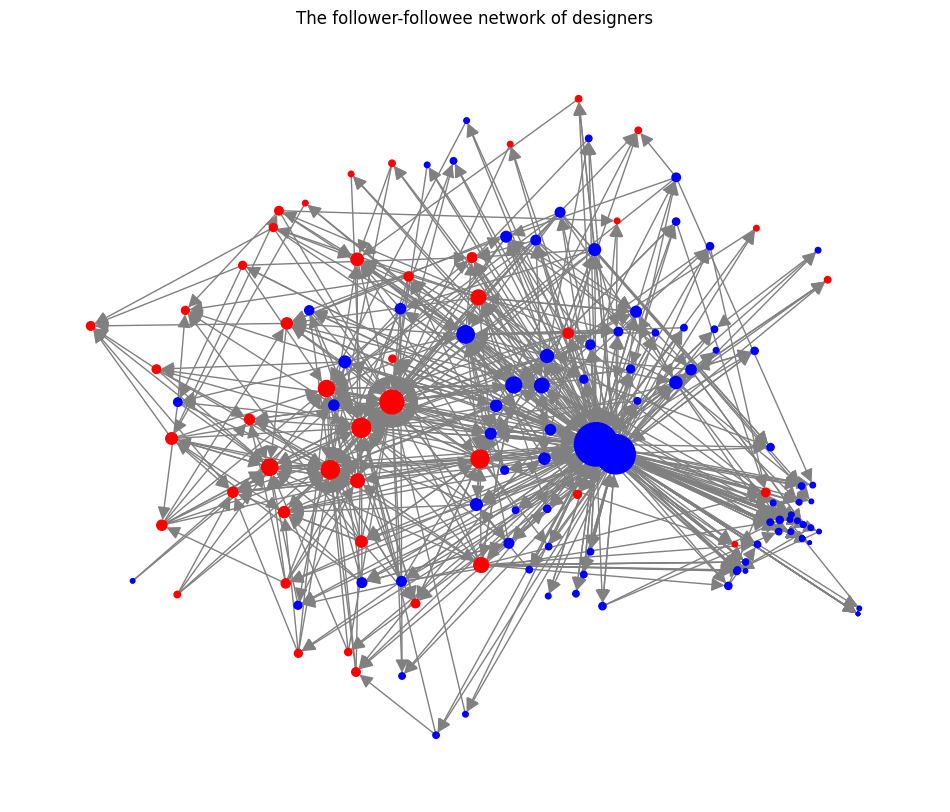

In [7]:
# we can also specify node and edge features
# to make the graph easier to interpret
figure(figsize=(12, 10), dpi=100)

# node size proportional to degree
node_size= [x * 900 for x in nx.degree_centrality(G).values()]

# choose a layout function
pos=nx.kamada_kawai_layout(G)

# edge color
edge_color="grey"

# make arrows more obvious
arrowsize=20

# make a list of colors corresponding to tenure
node_color= [nodelist.loc[i][3] for i in G.nodes] # tenure
#node_color= [nodelist.loc[i][4] for i in G.nodes] # submitted


nx.drawing.nx_pylab.draw_networkx(G,node_size=node_size,
                                  pos=pos,
                                  node_color=node_color,
                                  arrowsize=arrowsize,
                                  edge_color=edge_color,
                                  with_labels=False)
plt.title('The follower-followee network of designers')
plt.axis("off")
plt.show()